In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_data.csv')

In [3]:
df

,Construction_time,Storey_height,Number_of_stories,Floor_area,Plan_irregularity_A1,Plan_irregularity_A2,Plan_irregularity_A3,Plan_irregularity_A4,Vertical_irregularity_B1,Vertical_irregularity_B2,Vertical_irregularity_B3,Bays_Number_x,Bays_Number_y,System_type,Column_area,storey_number,Class
0,1975.0,3.00,4,884.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1,6.055,4,M
1,1980.0,2.80,4,888.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1,3.960,4,M
2,1991.0,2.80,4,992.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1,3.540,4,M
3,1985.0,2.70,6,915.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2,2.600,6,M
4,1985.0,2.70,6,723.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1,2.125,6,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,1981.0,2.85,3,1050.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,6.0,6.0,1,4.750,3,M
478,1996.0,2.80,4,488.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1,2.583,4,M
479,1994.0,2.80,4,524.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2,2.725,4,L
480,1994.0,2.80,4,456.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1,2.260,4,L


In [4]:
# Dropping column_area, story_number (Highly correlated)

df.drop(['storey_number'], axis=1, inplace=True)
df.drop(['Column_area'], axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [7]:
X

,Construction_time,Storey_height,Number_of_stories,Floor_area,Plan_irregularity_A1,Plan_irregularity_A2,Plan_irregularity_A3,Plan_irregularity_A4,Vertical_irregularity_B1,Vertical_irregularity_B2,Vertical_irregularity_B3,Bays_Number_x,Bays_Number_y,System_type
0,1975.0,3.00,4,884.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1
1,1980.0,2.80,4,888.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1
2,1991.0,2.80,4,992.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1
3,1985.0,2.70,6,915.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2
4,1985.0,2.70,6,723.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,1981.0,2.85,3,1050.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,6.0,6.0,1
478,1996.0,2.80,4,488.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1
479,1994.0,2.80,4,524.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2
480,1994.0,2.80,4,456.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 56)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [9]:
X_train

,Construction_time,Storey_height,Number_of_stories,Floor_area,Plan_irregularity_A1,Plan_irregularity_A2,Plan_irregularity_A3,Plan_irregularity_A4,Vertical_irregularity_B1,Vertical_irregularity_B2,Vertical_irregularity_B3,Bays_Number_x,Bays_Number_y,System_type
440,1989.0,2.850000,4,760.00,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1
44,1980.0,2.700000,5,2185.00,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,1
164,1998.0,2.850000,4,1096.00,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,1
378,1982.0,2.850000,2,234.00,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1
12,1991.0,2.750000,4,400.00,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1980.0,2.900000,4,1200.00,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1
418,1989.0,3.248151,2,432.00,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0,1
192,1992.0,2.800000,6,1892.16,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2
399,1987.0,2.700000,3,356.40,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,1


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit(y_train)

LabelEncoder()

In [12]:
le.classes_

array(['C/R', 'L', 'M', 'N', 'S'], dtype=object)

In [13]:
y_train = le.transform(y_train)



In [14]:
y_test = le.fit_transform(y_test)
y_test

array([2, 2, 3, 2, 0, 2, 2, 2, 0, 1, 2, 4, 3, 2, 0, 4, 0, 2, 0, 4, 2, 4,
       4, 2, 2, 2, 2, 1, 4, 3, 1, 1, 2, 1, 1, 2, 1, 3, 4, 1, 1, 2, 2, 2,
       0, 3, 3, 1, 2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 4, 2, 2, 1, 1, 1, 4,
       1, 1, 1, 3, 1, 1, 1, 4, 1, 4, 0, 1, 2, 3, 0, 4, 0, 4, 1, 1, 2, 2,
       2, 0, 3, 3, 1, 1, 0, 1, 4])

In [15]:
y_train

array([2, 3, 3, 1, 2, 3, 1, 4, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 4,
       4, 2, 3, 1, 4, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 4, 2, 1, 1, 1, 2, 0,
       2, 1, 2, 1, 3, 0, 2, 2, 2, 2, 3, 4, 2, 2, 1, 1, 1, 2, 2, 1, 0, 4,
       1, 2, 0, 1, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 4, 1, 2,
       1, 0, 1, 1, 4, 0, 1, 2, 3, 0, 2, 4, 2, 2, 1, 2, 1, 1, 4, 2, 2, 4,
       3, 1, 2, 0, 3, 1, 2, 1, 0, 3, 4, 1, 1, 4, 4, 1, 0, 3, 2, 2, 2, 2,
       2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 4, 1, 4, 3, 1, 4, 2, 1, 3, 3, 1, 3,
       1, 4, 4, 0, 3, 4, 0, 0, 1, 1, 2, 0, 0, 1, 3, 2, 1, 0, 4, 1, 0, 4,
       2, 3, 4, 3, 3, 3, 4, 1, 3, 3, 2, 1, 0, 1, 1, 1, 2, 2, 4, 0, 1, 2,
       1, 3, 3, 0, 1, 1, 4, 3, 2, 3, 1, 2, 1, 2, 2, 1, 2, 1, 3, 0, 4, 1,
       0, 3, 3, 1, 2, 2, 2, 1, 3, 0, 2, 2, 0, 3, 1, 0, 2, 0, 3, 1, 1, 2,
       1, 2, 0, 2, 0, 0, 3, 3, 1, 4, 3, 1, 1, 4, 3, 1, 0, 0, 1, 3, 4, 1,
       1, 0, 1, 1, 1, 3, 0, 4, 0, 2, 4, 2, 0, 3, 1, 1, 2, 1, 2, 2, 4, 1,
       4, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 4, 0, 1,

In [16]:
# Feature scaling shoud be done after data splitting.There should be no influence on test data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:-1] = sc.fit_transform(X_train.iloc[:,:-1])

#Not using fit method so that model doesn't know the mean and standard deviation of the test dataset
X_test.iloc[:,:-1] = sc.transform(X_test.iloc[:,:-1])

In [17]:
#import xgboost as xgb

In [18]:
from xgboost import XGBClassifier

In [19]:
#dtrain = xgb.DMatrix(data=X_train, label=y_train)
#dtest = xgb.DMatrix(data=X_test)

In [72]:
xgb = XGBClassifier(objective='multi:softmax', max_depth=6, num_class=5, n_estimators=100, random_state=42, subsample=0.8)

In [21]:
#params = {
    #'max_depth': 6,
    #'objective': 'multi:softmax',  # error evaluation for multiclass training
    #'num_class': 5
#}

In [73]:
# Fit the model

#clf = xgb.train(params, dtrain)

clf = xgb.fit(X_train, y_train)

In [74]:
# Predict the unseen data

y_pred = clf.predict(X_test)

In [75]:
clf.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 5}

In [76]:
# accuracy score

accuracy_score(y_test, y_pred)

0.3917525773195876

In [58]:
# Hyperparameter Tuning and Cross Validation

param_dict = {'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.10],
             'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
             'max_depth': [5, 8, 10, 15]
             }
print(param_dict)

{'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': [5, 8, 10, 15]}


In [59]:
from sklearn.model_selection import GridSearchCV

dt_grid = GridSearchCV(estimator = XGBClassifier(),
                      param_grid = param_dict,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [60]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1],
                         'max_depth': [5, 8, 10, 15]},
             verbose=2)

In [61]:
dt_grid.best_params_


{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 15}

In [62]:
dt_grid.best_score_

0.4233766233766233

In [63]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.36      0.35        11
           1       0.42      0.57      0.49        30
           2       0.45      0.42      0.43        31
           3       0.22      0.18      0.20        11
           4       0.29      0.14      0.19        14

    accuracy                           0.39        97
   macro avg       0.34      0.33      0.33        97
weighted avg       0.38      0.39      0.38        97



In [64]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 4  2  5  0  0]
 [ 1 17  7  2  3]
 [ 4 10 13  2  2]
 [ 0  6  3  2  0]
 [ 3  5  1  3  2]]


In [65]:
labels = ['C/R', 'L', 'M', 'N', 'S']
labels.sort()

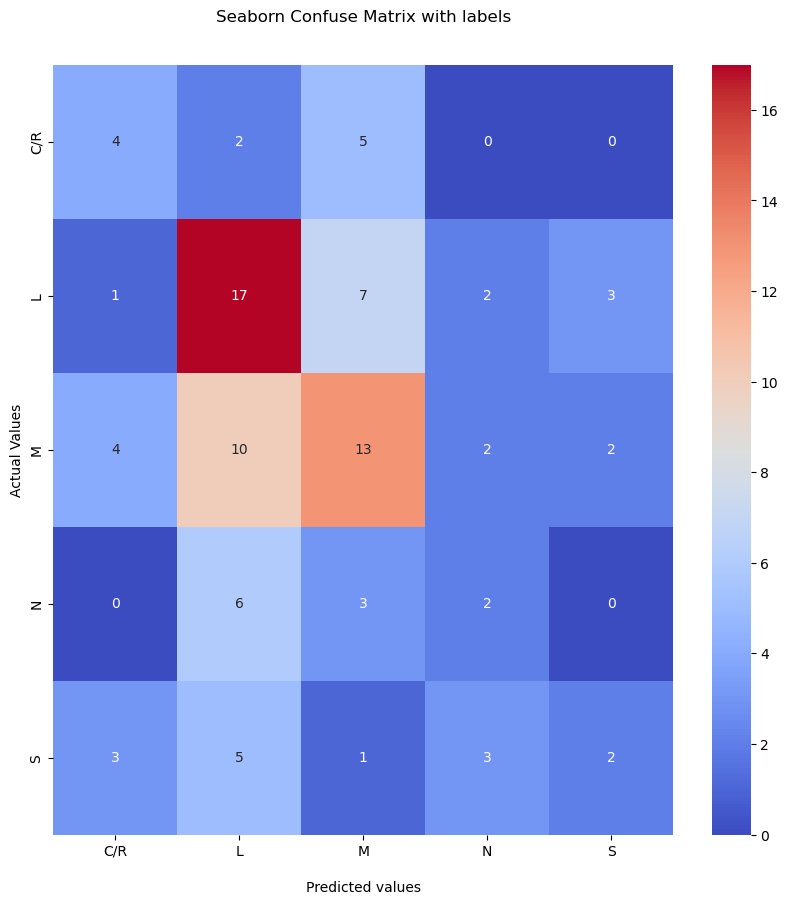

In [66]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='.0f',
                xticklabels=labels, yticklabels=labels)

ax.set_title('Seaborn Confuse Matrix with labels\n\n');
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual Values');